In [1]:
from bs4 import BeautifulSoup
import requests

In [53]:
strings = !cat ../data/week5/class_1_synthetases.fasta | grep ">"
rcsb_ids = [s.split("|")[-1] for s in strings]

In [54]:
descriptions = []

for ii in rcsb_ids:
    i = ii[1:-2]
    response = requests.get("https://www.rcsb.org/structure/{}".format(i))
    soup = BeautifulSoup(response.content, 'html.parser')
    title = soup.findAll(name="span", attrs={"id": "structureTitle"})[0].text.lower()
    organism = soup.findAll(name="li", attrs={"id": "header_organism"})[0].text.split(":")[1][1:].split()[:2]
    
    descriptions.append({"title": title, "organism": organism, "rcsb": ii})

In [55]:
aa_dict = {
    "arginyl": "ARG",
    "ile": "ILE",
    "glutaminyl": "GLN",
    "tyrosyl": "TYR",
    "isoleucyl": "ILE",
    "lysyl": "LYS",
    "leucyl": "LEU",
    "valyl": "VAL",
    "glutamyl": "GLU",
    "tyrrs": "TYR",
    "cysteinyl": "CYS",
    "of a human aminoacyl-trna synthetase cytokine": "TYR",
    "methionyl": "MET",
    "tryptophanyl": "TRP",
    "tyrosyl": "TYR"
}

In [56]:
species_dict = {
    "Saccharomyces": "Eukaryota",
    "Staphylococcus": "Bacteria",
    "Escherichia": "Bacteria",
    "Thermus": "Bacteria",
    "Pyrococcus": "Archea",
    "Methanocaldococcus": "Archea",
    "Homo": "Eukaryota",
    "Deinococcus": "Bacteria",
    "Aquifex": "Bacteria",
    "Archaeoglobus": "Archea",
    "Acanthamoeba": "Eukaryota",
    "Thermotoga": "Bacteria",
    "Geobacillus": "Bacteria",
    "Mycoplasma": "Eukaryota",
    "Campylobacter": "Bacteria"
}

In [57]:
for d in descriptions:
    for k in aa_dict:
        if k in d["title"]:
            d["residue"] = aa_dict[k]
    assert "residue" in d, d

In [58]:
for d in descriptions:
    for k in species_dict:
        if k in d["organism"]:
            d["domain"] = species_dict[k]
    assert "domain" in d, d

In [60]:
info_dict = dict()
for d in descriptions:
    info_dict[d["rcsb"]] = d

In [68]:
import re

In [ ]:
re.search

In [134]:
lines = !cat ../data/week5/phylo

substr_dict = dict()

for line in lines[1:]:
    m = re.search(r"scop_(.*)", line)
    if m is None:
        continue
    substr = line[m.span()[0]:m.span()[1]]
    struct = line[m.span()[0]+5:m.span()[0]+12]
    substr_dict[substr] = struct

Phylo tree from phylogeny.ft

In [149]:
phylo_str = """((((scop_d1j09a2_sp_*_SYE_THET8_d1j09a2:0.5846,scop_d2o5ra2_d2o5ra2:0.6136)
0.98:0.796,(scop_d2hz7a2_firstres_43_d2hz7a2:0.1577,
scop_d1gtra2_sp_*_SYQ_ECOLI_firstres_8_d1gtra2:0.6727)0.99:1.057)0.97:0.7974,
(((scop_d1yi8a2_sp_*_SYW2_DEIRA_firstres_21_d1yi8a2:0.532,
(scop_d2el7a2_d2el7a2:0.4288,scop_d2yy5a2_firstres_2_d2yy5a2:0.6601)0.94:0.4279)
0.88:0.661,(scop_d1r6ta2_sp_*_SYW_HUMAN_firstres_82_d1r6ta2:1.306,
scop_d2ip1a2_firstres_99_d2ip1a2:0.8343)0.99:1.483)0.82:0.5448,
((((scop_d1n3la_sp_*_SYYC_HUMAN_firstres_4_d1n3la:0.9457,
scop_d1j1ua_sp_*_SYY_METJA_d1j1ua:0.5452)0.93:0.2459,
scop_d2cyba2_sp_*_SYY_ARCFU_firstres_2_d2cyba2:0.2039)0.77:0.2252,
scop_d2j5ba2_d2j5ba2:1.288)0.97:0.6623,
(scop_d1h3fa1_sp_*_SYY_THET2_firstres_5_d1h3fa1:1.197,
(scop_d2pida2_firstres_37_d2pida2:0.5452,
((scop_d2ts1_sp_*_SYY_BACST_d2ts1:0.2291,scop_d1jila_firstres_2_d1jila:0.3573)
0.66:0.04944,scop_d2yxna2_d2yxna2:0.4254)0.96:0.5017)1:1.111)0.69:0.3293)
0.94:0.5694)0.89:0.4698)0.84:0.3268,(((scop_d1iq0a2_firstres_97_d1iq0a2:1.704,
scop_d1f7ua2_firstres_136_d1f7ua2:2.046)0.91:0.8023,
(scop_d1li5a2_sp_*_SYC_ECOLI_d1li5a2:1.776,
(scop_d1irxa2_sp_*_SYK_PYRHO_firstres_3_d1irxa2:1.967,
((((scop_d1ivsa4_sp_*_SYV_THETH_d1ivsa4:1.064,
(sp_*_SYI_THET8_scop_d1ile_3_d1ile_3:0.7586,
scop_d1ffya3_sp_*_SYI1_STAAU_d1ffya3:1.254)0.72:0.3604)1:0.9691,
(scop_d1pfva2_sp_*_SYM_ECOLI_firstres_4_d1pfva2:0.8667,
scop_d1rqga2_sp_*_SYM_PYRAB_d1rqga2:0.9502)0.99:0.8137)0.77:0.3422,
(scop_d2ct8a2_sp_*_SYM_AQUAE_d2ct8a2:0.4454,scop_d2d5ba2_d2d5ba2:0.7236)1:0.9396)
0.6:0.2308,scop_d1wkba3_sp_*_SYL_PYRHO_firstres_4_d1wkba3:1.566)0:0.2632)
0.47:0.1928)0.36:0.1326)0.78:0.2628,scop_d3fnra2_firstres_100_d3fnra2:1.984)
0.84:0.1224);"""

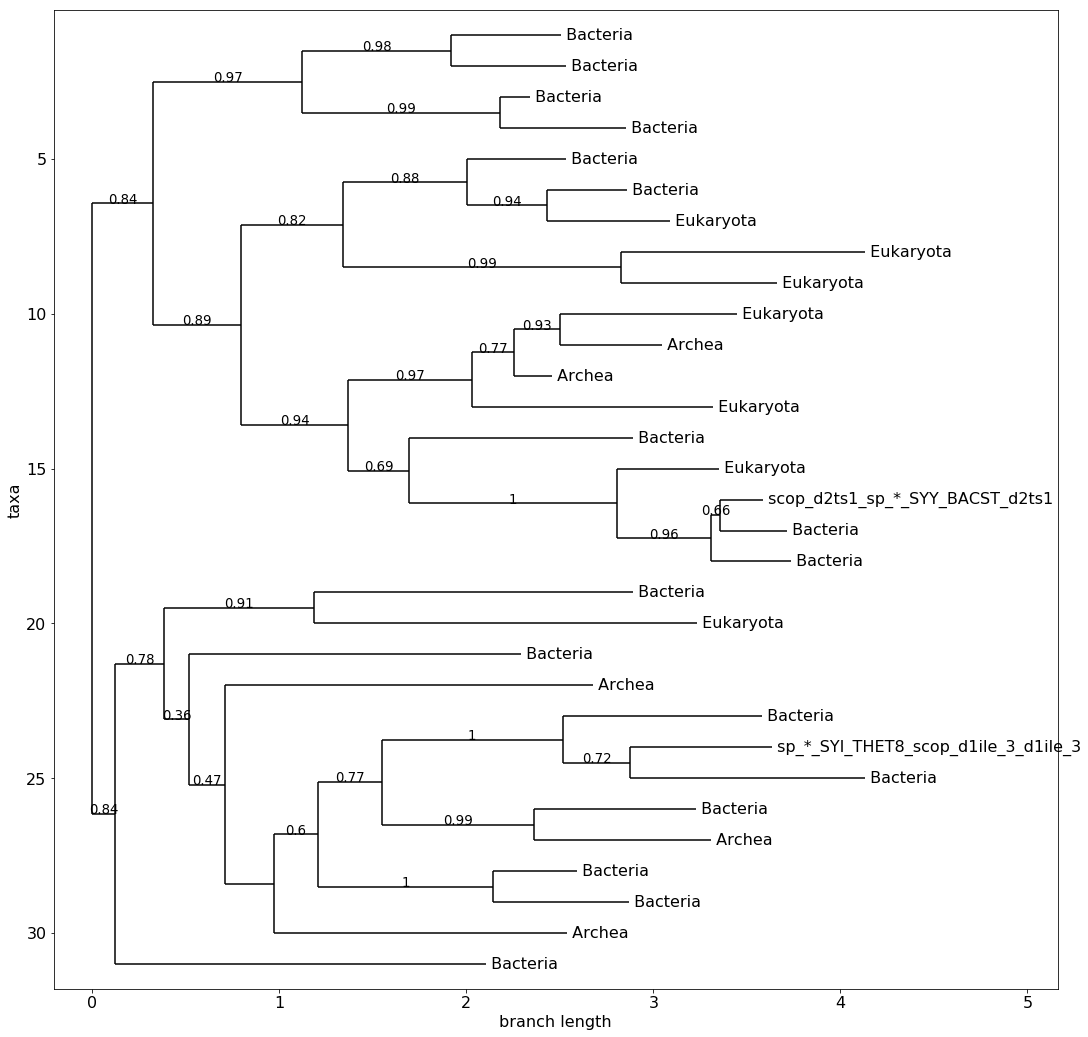

In [150]:
for s in substr_dict:
    phylo_str = phylo_str.replace(s, info_dict[substr_dict[s]]["domain"])
    
with open("../data/week5/phylo_newick", "w") as f:
    f.write(phylo_str)

from Bio import Phylo
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams["font.size"] = 16

trees = Phylo.parse('../data/week5/phylo_newick', 'newick')
    
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(1, 1, 1)
Phylo.draw(next(trees), axes=ax)

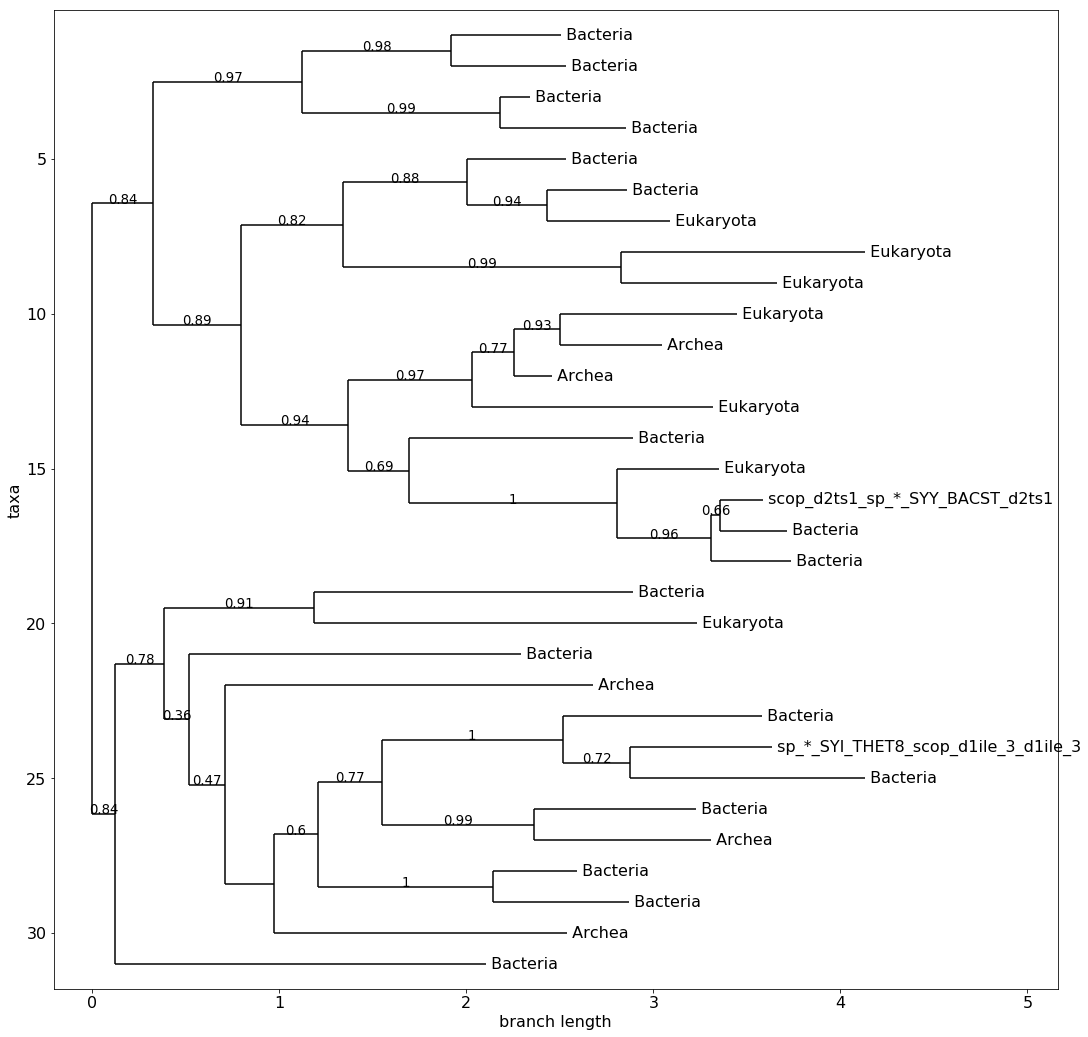

In [151]:
for s in substr_dict:
    phylo_str = phylo_str.replace(s, info_dict[substr_dict[s]]["residue"])
    
with open("../data/week5/phylo_newick", "w") as f:
    f.write(phylo_str)

from Bio import Phylo
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams["font.size"] = 16

trees = Phylo.parse('../data/week5/phylo_newick', 'newick')
    
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(1, 1, 1)
Phylo.draw(next(trees), axes=ax)